<a href="https://colab.research.google.com/github/Bosy-Ayman/Machine_Learning/blob/main/Lab_9_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

# Neural Networks
A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the ***human brain***. It is a type of machine learning process, called ***deep learning***, that uses interconnected ***nodes*** or ***neurons*** in a layered structure that resembles the human brain. It creates an ***adaptive system*** that computers use to ***learn from their mistakes and improve continuously***.





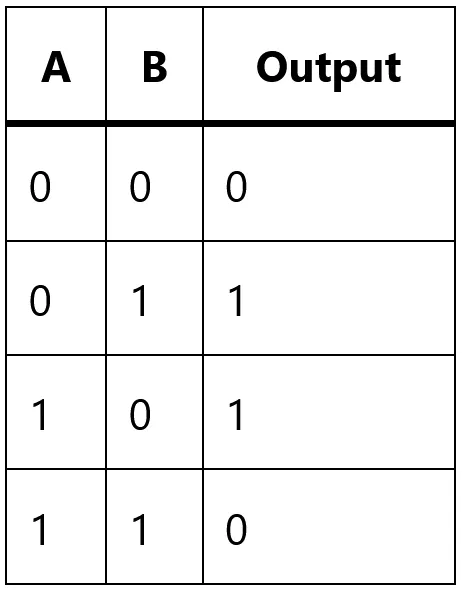

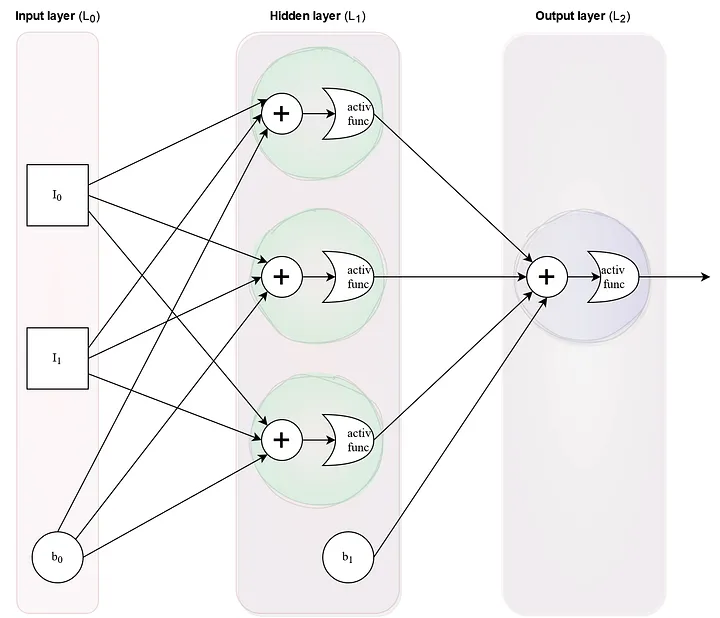

# What are neural networks used for?

1. Computer vision:
  - ***Facial recognition*** to identify faces and recognize attributes like open eyes, glasses, and facial hair
  - ***Image labeling*** to identify brand logos, clothing, safety gear, and other image details

2. Speech recognition:
  - **Convert clinical conversations** into ***documentation*** in real time

3. Natural language processing:
  - **Document summarization** and **article generation** for a given topic


#House price dataset

Download link: https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

In [ ]:
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


We have our input features in the first ten columns:

* Lot Area (in sq ft)
* Overall Quality (scale from 1 to 10)
* Overall Condition (scale from 1 to 10)
* Total Basement Area (in sq ft)
* Number of Full Bathrooms
* Number of Half Bathrooms
* Number of Bedrooms above ground
* Total Number of Rooms above ground
* Number of Fireplaces
* Garage Area (in sq ft)

In our last column, we have the feature that we would like to predict:

Is the house price above the median or not? (1 for yes and 0 for no)

##Divide into features and labels

In [ ]:
X= df.drop(columns='AboveMedianPrice', axis=1)
y= df['AboveMedianPrice']

##Normalization using min max scaling

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

##Train, test and validation split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
1022/32

31.9375

#Neural network model using keras sequential

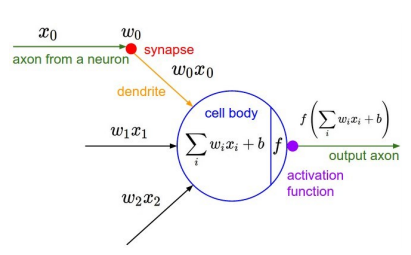

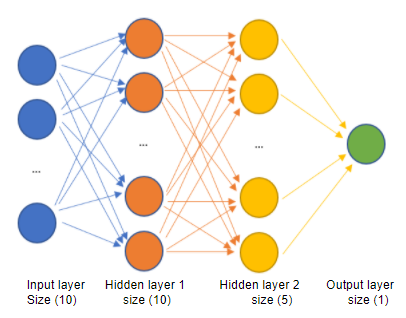

We create a Sequential model and add layers.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.

Fully connected layers are defined using the Dense class.

We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

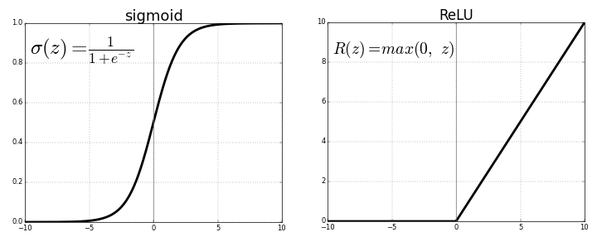

In [ ]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(10,)), #vector
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

We must specify the loss function to use to evaluate a set of weights. The optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

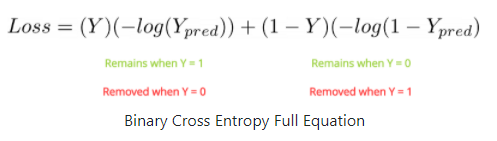

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

* Epoch: One pass through all of the rows in the training dataset.
* Batch: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs.

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32,epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6991 - accuracy: 0.4971 - val_loss: 0.6943 - val_accuracy: 0.4932
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4853 - val_loss: 0.6901 - val_accuracy: 0.4932
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5088 - val_loss: 0.6872 - val_accuracy: 0.5616
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.5577 - val_loss: 0.6849 - val_accuracy: 0.5982
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5978 - val_loss: 0.6832 - val_accuracy: 0.6210
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.6037 - val_loss: 0.6819 - val_accuracy: 0.6164
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.6057 - val_loss: 0.6807 - val_accuracy: 0.6210
Epoch 8/100


In [ ]:
model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8767


[0.3176528811454773, 0.8767123222351074]

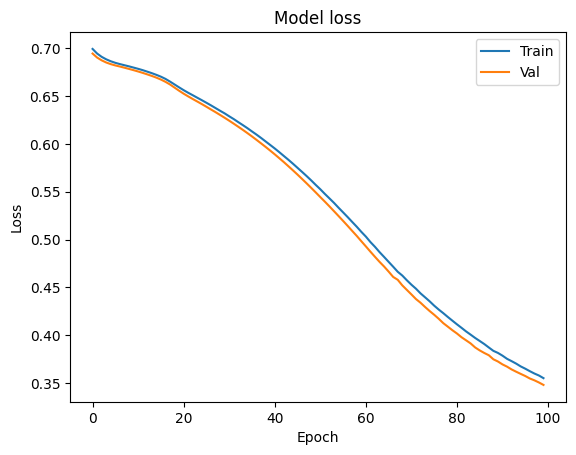

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

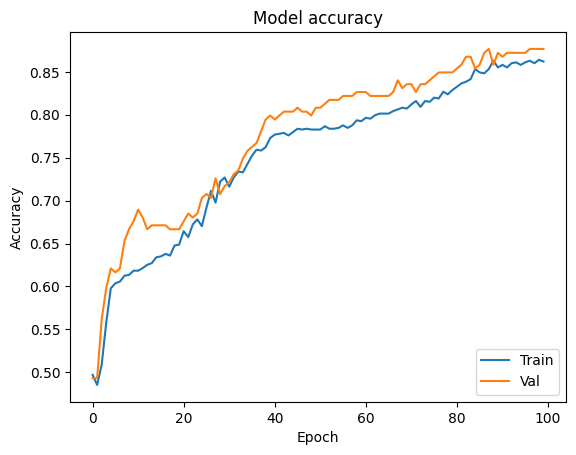

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Heart Attack dataset


- Fit a neural network to Heart Attack dataset (https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility/notebooks) .  

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X= df.drop(columns='target', axis=1)
y= df['target']

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(212, 13) (45, 13) (46, 13) (212,) (45,) (46,)


In [ ]:
Y_train.value_counts()

target
1    115
0     97
Name: count, dtype: int64

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(14, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32,epochs=100,
          validation_data=(X_val, Y_val),verbose = 0)

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.7617 - accuracy: 0.6957


[0.7617054581642151, 0.695652186870575]

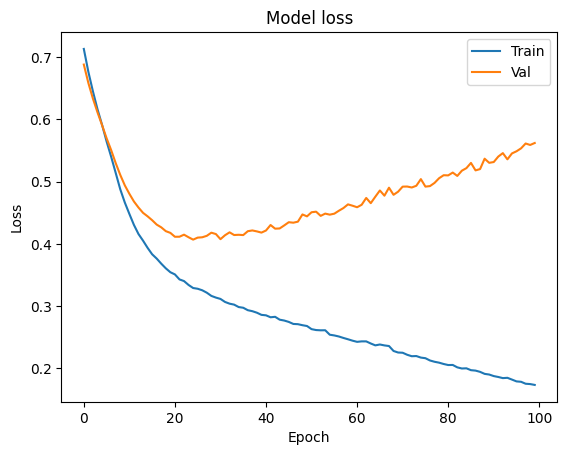

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

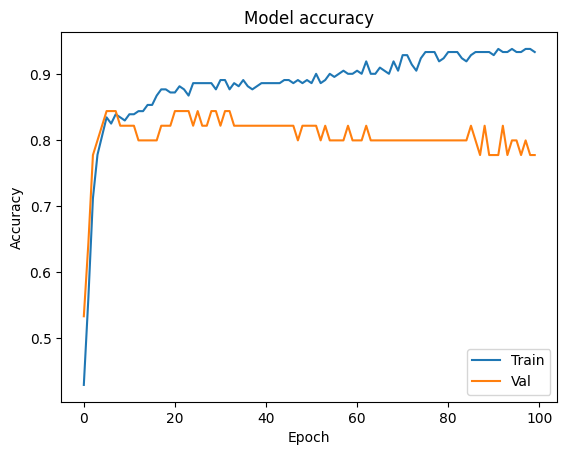

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#References
- https://github.com/josephlee94/intuitive-deep-learning/blob/master/Part%201:%20Predicting%20House%20Prices/Coding%20Companion%20for%20Intuitive%20Deep%20Learning%20Part%201%20Annotated.ipynb

- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


- Stanford CS class CS231n: Convolutional Neural Networks for Visual Recognition http://cs231n.github.io/neural-networks-1/

